In [58]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("./database/GuildStashHistory.csv")

In [60]:
df = df.drop(["League"], axis=1)
df

,Date,Account,Action,Stash,Item
0,22/12/2023 16:29:00,ThrarThylnenfallën,modified,$,717× Orb of Alchemy
1,22/12/2023 16:28:59,ThrarThylnenfallën,modified,$,218× Orb of Scouring
2,22/12/2023 16:28:57,ThrarThylnenfallën,modified,$,248× Orb of Scouring
3,22/12/2023 16:28:57,ThrarThylnenfallën,modified,$,737× Orb of Alchemy
4,22/12/2023 16:28:41,ThrarThylnenfallën,modified,$,221× Orb of Scouring
...,...,...,...,...,...
27657,08/12/2023 20:33:19,ErZil,added,$,2× Blacksmith's Whetstone
27658,08/12/2023 20:33:19,ErZil,added,$,Orb of Augmentation
27659,08/12/2023 20:33:19,ErZil,added,$,level 1 0% Fireball
27660,08/12/2023 20:16:43,ErZil,added,$,Orb of Transmutation


In [61]:
df = df[df["Stash"] == "$"].drop(["Stash"], axis=1)
df

,Date,Account,Action,Item
0,22/12/2023 16:29:00,ThrarThylnenfallën,modified,717× Orb of Alchemy
1,22/12/2023 16:28:59,ThrarThylnenfallën,modified,218× Orb of Scouring
2,22/12/2023 16:28:57,ThrarThylnenfallën,modified,248× Orb of Scouring
3,22/12/2023 16:28:57,ThrarThylnenfallën,modified,737× Orb of Alchemy
4,22/12/2023 16:28:41,ThrarThylnenfallën,modified,221× Orb of Scouring
...,...,...,...,...
27657,08/12/2023 20:33:19,ErZil,added,2× Blacksmith's Whetstone
27658,08/12/2023 20:33:19,ErZil,added,Orb of Augmentation
27659,08/12/2023 20:33:19,ErZil,added,level 1 0% Fireball
27660,08/12/2023 20:16:43,ErZil,added,Orb of Transmutation


In [62]:
df = df.reindex(index=df.index[::-1])
df

,Date,Account,Action,Item
27661,08/12/2023 20:16:41,ErZil,added,9× Transmutation Shard
27660,08/12/2023 20:16:43,ErZil,added,Orb of Transmutation
27659,08/12/2023 20:33:19,ErZil,added,level 1 0% Fireball
27658,08/12/2023 20:33:19,ErZil,added,Orb of Augmentation
27657,08/12/2023 20:33:19,ErZil,added,2× Blacksmith's Whetstone
...,...,...,...,...
4,22/12/2023 16:28:41,ThrarThylnenfallën,modified,221× Orb of Scouring
3,22/12/2023 16:28:57,ThrarThylnenfallën,modified,737× Orb of Alchemy
2,22/12/2023 16:28:57,ThrarThylnenfallën,modified,248× Orb of Scouring
1,22/12/2023 16:28:59,ThrarThylnenfallën,modified,218× Orb of Scouring


In [63]:
def strItemRead(itemStr):
    if itemStr[0].isdigit():
        ndigits = 0
        for i in itemStr:
            if i.isdigit():
                ndigits += 1
        nbItem = int(itemStr[0:ndigits])
        item = itemStr[ndigits+2:]
    else:
        item = itemStr
        nbItem = 1
    return nbItem, item

print(strItemRead("1x Divine Orb"))
print(strItemRead("level 1 0% Fireball"))

(1, 'Divine Orb')
(1, 'level 1 0% Fireball')


In [64]:
Stash = []
Diff = []

for index, row in df.iterrows():
    previous_state = Stash[-1] if len(Stash) > 0 else None
    updated_state = {
        "Datetime" : row["Date"],
        "Account" : row["Account"]
    }

    if previous_state is None:
        stash_state = updated_state
    else:
        stash_state = {**previous_state, **updated_state}

    stash_diff = {
        "Datetime" : row["Date"],
        "Account" : row["Account"]
    }

    nbItem, item = strItemRead(row["Item"])

    if row["Action"] == "added":
        stash_state[item] = nbItem
        stash_diff[item] = nbItem

    elif row["Action"] == "removed":
        stash_state[item] -= nbItem
        stash_diff[item] = -nbItem

    elif row["Action"] == "modified":
        stash_state[item] = nbItem
        stash_diff[item] = nbItem - Stash[-1][item]
        
    Stash.append(stash_state)
    Diff.append(stash_diff)

df_Stash = pd.DataFrame(Stash)
df_Diff = pd.DataFrame(Diff)

In [65]:
import matplotlib.dates as mdates

In [71]:
df_Stash["Datetime"] = pd.to_datetime(df_Stash["Datetime"], format="%d/%m/%Y %H:%M:%S")

In [74]:
df_Stash["Datetime"][1000]

datetime.date(2023, 12, 9)

C:\Users\lvteo\AppData\Local\Temp\ipykernel_28132\3198224984.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')
C:\Users\lvteo\AppData\Local\Temp\ipykernel_28132\3198224984.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(dates, df_Stash["Chaos Orb"], linestyle='solid', marker='None')


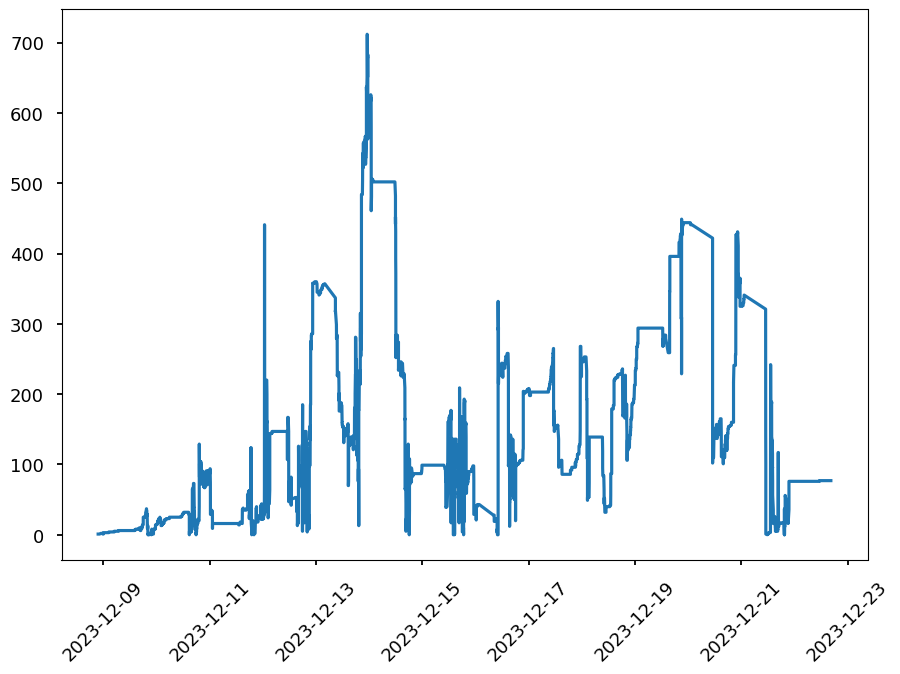

In [97]:
dates = mdates.date2num(df_Stash["Datetime"])
plt.style.use('seaborn-talk')
plt.xticks(rotation=45)
plt.plot_date(dates, df_Stash["Chaos Orb"], linestyle='solid', marker='None')

C:\Users\lvteo\AppData\Local\Temp\ipykernel_28132\3312979379.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')
C:\Users\lvteo\AppData\Local\Temp\ipykernel_28132\3312979379.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(dates, df_Stash["Scroll of Wisdom"], linestyle='solid', marker='None')


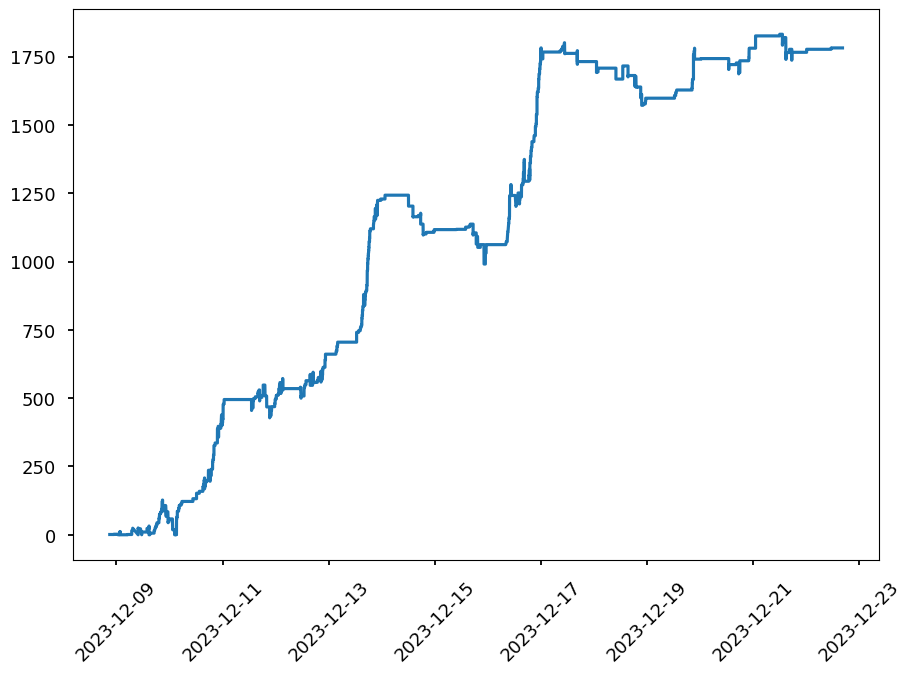

In [99]:
dates = mdates.date2num(df_Stash["Datetime"])
plt.style.use('seaborn-talk')
plt.xticks(rotation=45)
plt.plot_date(dates, df_Stash["Scroll of Wisdom"], linestyle='solid', marker='None')

In [100]:
#hand written data from Divine Orb/Chaos Orb ratio from poe.ninja

Div_History = [40, 87, 103, 133, 138, 145, 155, 168, 172, 172, 172, 175, 178, 185, 195, 200]
Date_Div = [datetime.date(2023, 12, 8), 
            datetime.date(2023, 12, 9),
            datetime.date(2023, 12, 10),
            datetime.date(2023, 12, 11),
            datetime.date(2023, 12, 12),
            datetime.date(2023, 12, 13),
            datetime.date(2023, 12, 14),
            datetime.date(2023, 12, 15),
            datetime.date(2023, 12, 16),
            datetime.date(2023, 12, 17),
            datetime.date(2023, 12, 18),
            datetime.date(2023, 12, 19),
            datetime.date(2023, 12, 20),
            datetime.date(2023, 12, 21),
            datetime.date(2023, 12, 22),
            datetime.date(2023, 12, 23)]


def getDivineRatio(date):
    for i in range(len(Date_Div)):
        if date <= Date_Div[i]:
            return Div_History[i]
    return Div_History[-1]

df_Stash["Date"] = pd.to_datetime(df_Stash["Datetime"], format = "%d/%m/%Y %H:%M:%S").dt.date

In [101]:
getDivineRatio(df_Stash["Date"][5000])

138

In [102]:
CurrencySeries = df_Stash["Chaos Orb"] + df_Stash["Divine Orb"] * df_Stash["Date"].apply(getDivineRatio)

In [103]:
CurrencySeries.fillna(0, inplace=True)

C:\Users\lvteo\AppData\Local\Temp\ipykernel_28132\916244391.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')
C:\Users\lvteo\AppData\Local\Temp\ipykernel_28132\916244391.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(dates, CurrencySeries, linestyle='solid', marker='None')


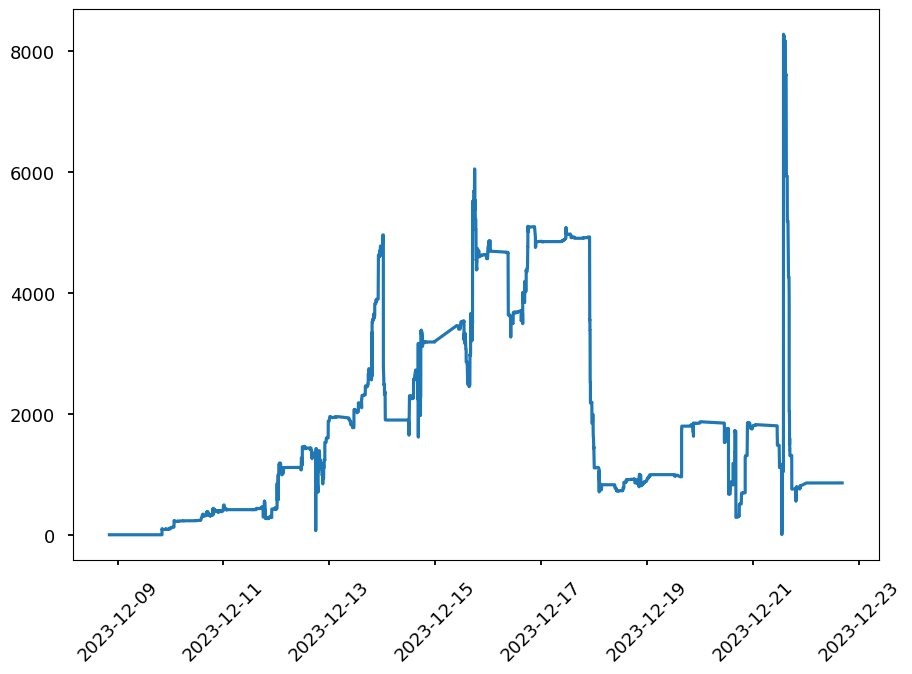

In [105]:
dates = mdates.date2num(df_Stash["Datetime"])
plt.style.use('seaborn-talk')
plt.xticks(rotation=45)
plt.plot_date(dates, CurrencySeries, linestyle='solid', marker='None')